In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
forest_data = pd.read_csv("/content/forestfires.csv")
forest_data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


Printing dataset description

In [3]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


checking for duplicate values

In [4]:
forest_data.duplicated().sum()

4

Removing duplicates

In [5]:
forest_data_1 = forest_data.copy()
forest_data_1.drop_duplicates(inplace = True)
forest_data_1[forest_data_1.duplicated()]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area


In [6]:
numerical_features = [features for features in forest_data_1.columns if forest_data_1[features].dtypes != 'O']

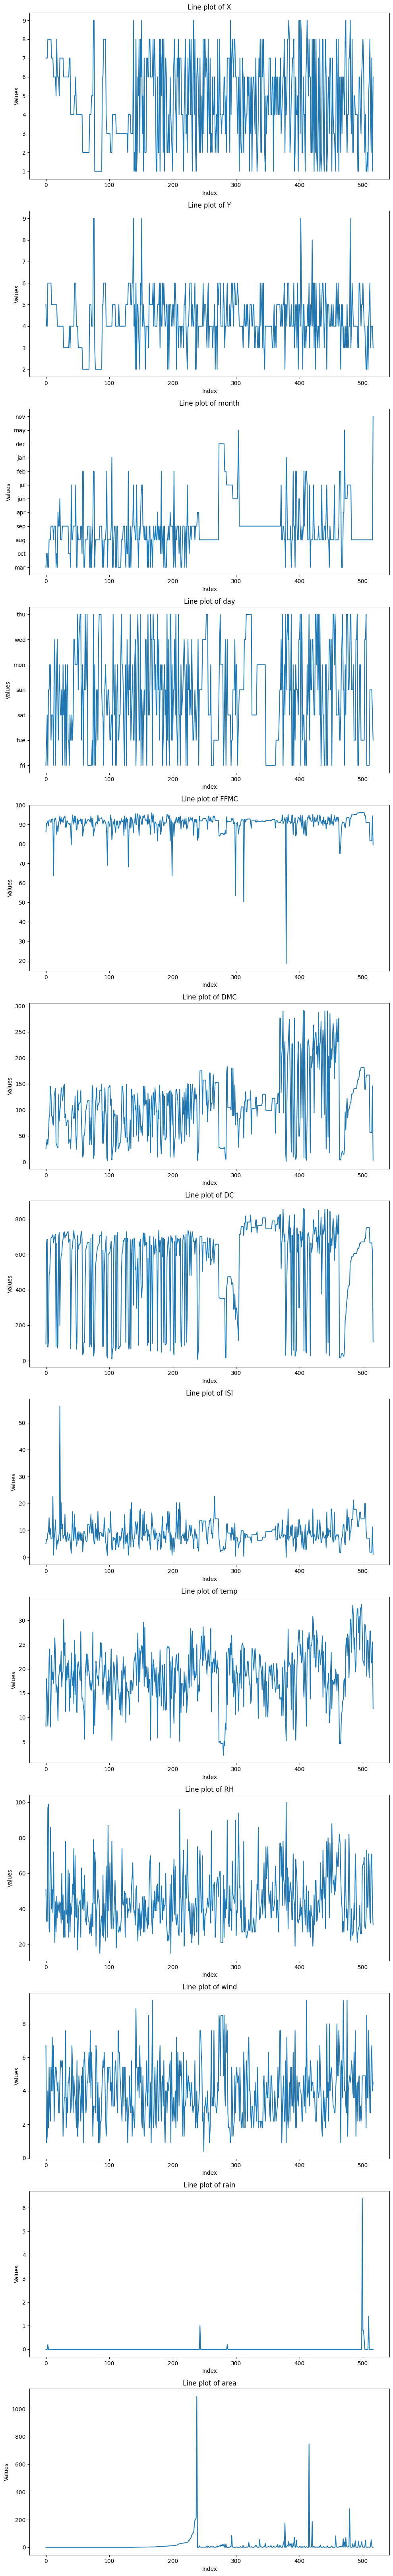

In [7]:

cols = len(forest_data_1.columns)

num_rows = cols
fig, axes = plt.subplots(num_rows, 1, figsize=(10, 5*num_rows))

for i, column in enumerate(forest_data_1.columns):
    ax = axes[i] if num_rows > 1 else axes
    ax.plot(forest_data_1.index, forest_data_1[column])
    ax.set_title(f"Line plot of {column}")
    ax.set_xlabel("Index")
    ax.set_ylabel("Values")

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

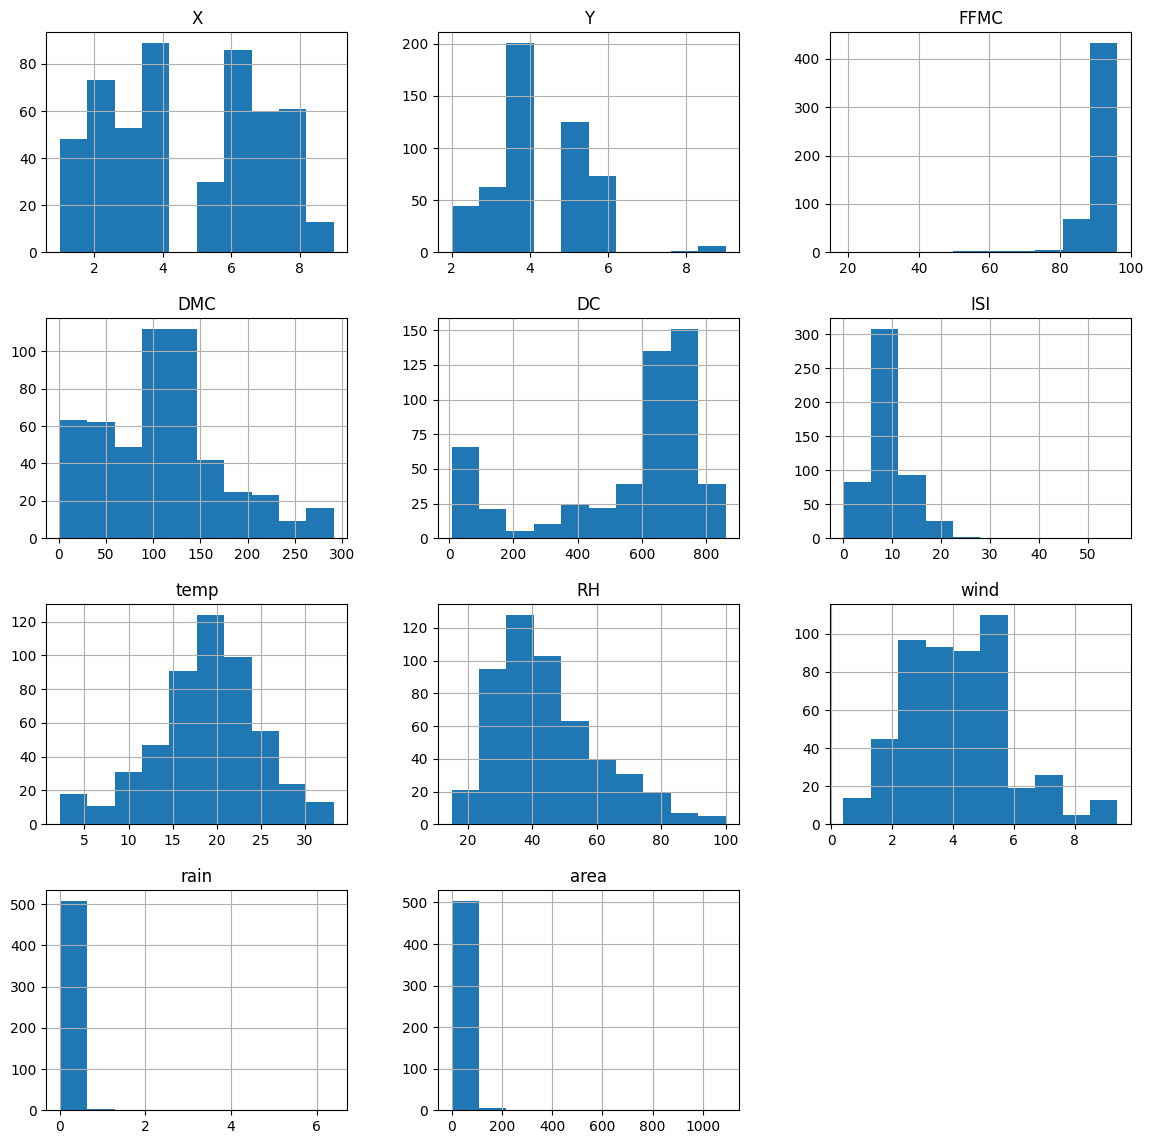

In [8]:
forest_data_1.hist(figsize = (14, 14))

In [9]:
forest_data_1['month'].value_counts()

month
aug    182
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

In [10]:
forest_data_1['month'].describe()

count     513
unique     12
top       aug
freq      182
Name: month, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'apr'),
  Text(1, 0, 'aug'),
  Text(2, 0, 'dec'),
  Text(3, 0, 'feb'),
  Text(4, 0, 'jan'),
  Text(5, 0, 'jul'),
  Text(6, 0, 'jun'),
  Text(7, 0, 'mar'),
  Text(8, 0, 'may'),
  Text(9, 0, 'nov'),
  Text(10, 0, 'oct'),
  Text(11, 0, 'sep')])

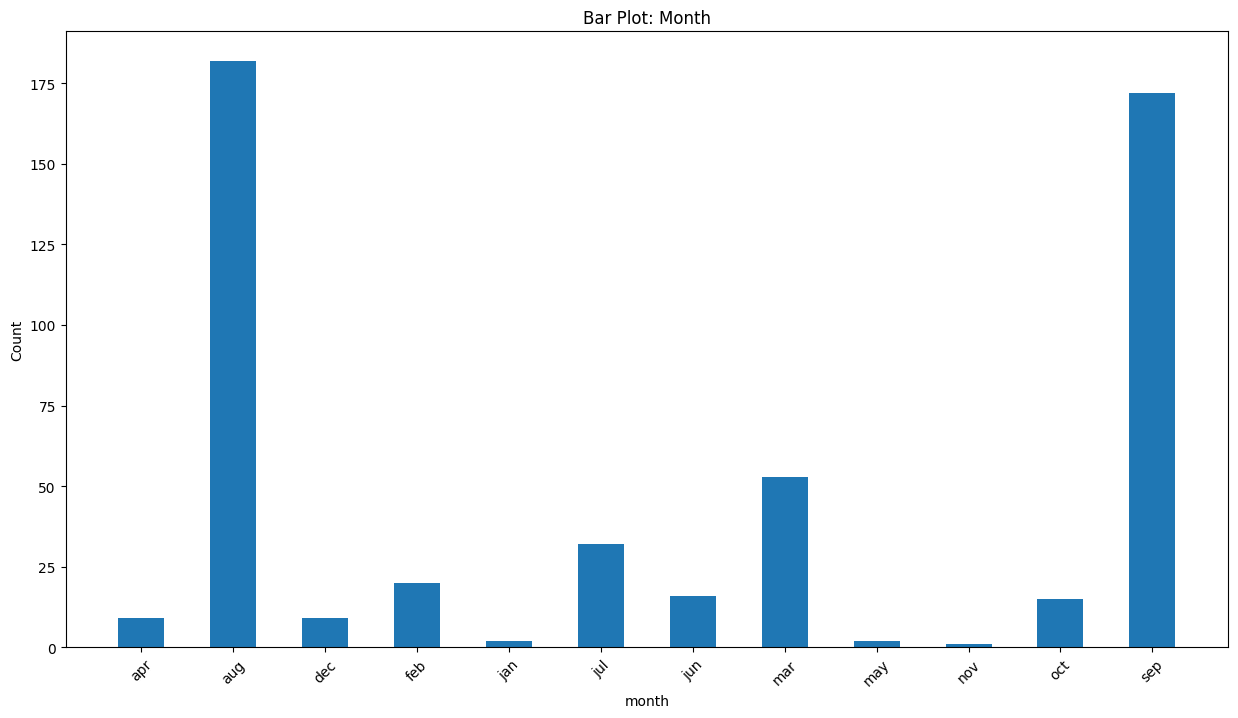

In [11]:
unique_class, counts = np.unique(forest_data_1["month"], return_counts=True)
plt.figure(figsize=(15, 8))
plt.bar(unique_class, counts, width=0.5)

plt.xlabel('month', fontsize=10)
plt.ylabel('Count')
plt.title('Bar Plot: Month')
plt.xticks(rotation=45)

In [12]:
forest_data_1['day'].value_counts()

day
sun    94
fri    84
sat    83
mon    74
tue    64
thu    61
wed    53
Name: count, dtype: int64

In [13]:
forest_data_1['day'].describe()

count     513
unique      7
top       sun
freq       94
Name: day, dtype: object

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'fri'),
  Text(1, 0, 'mon'),
  Text(2, 0, 'sat'),
  Text(3, 0, 'sun'),
  Text(4, 0, 'thu'),
  Text(5, 0, 'tue'),
  Text(6, 0, 'wed')])

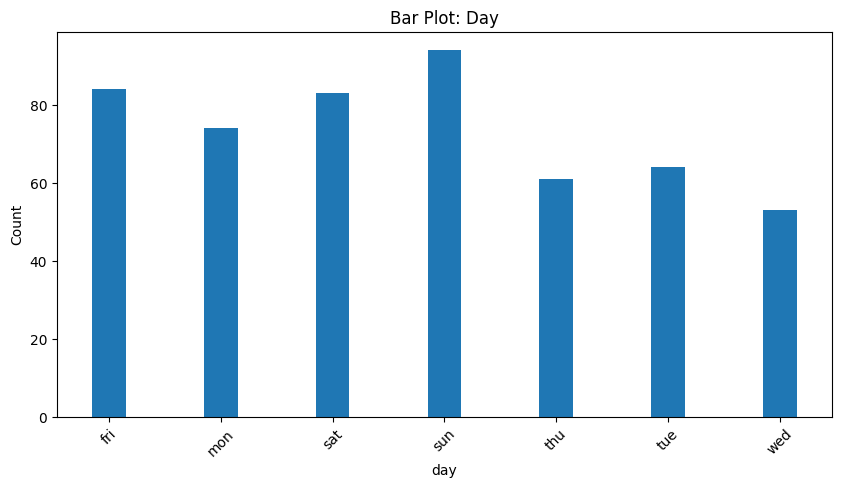

In [14]:
unique_class, counts = np.unique(forest_data_1["day"], return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique_class, counts, width=0.3)

plt.xlabel('day', fontsize=10)
plt.ylabel('Count')
plt.title('Bar Plot: Day')
plt.xticks(rotation=45)

Text(0, 0.5, 'Area')

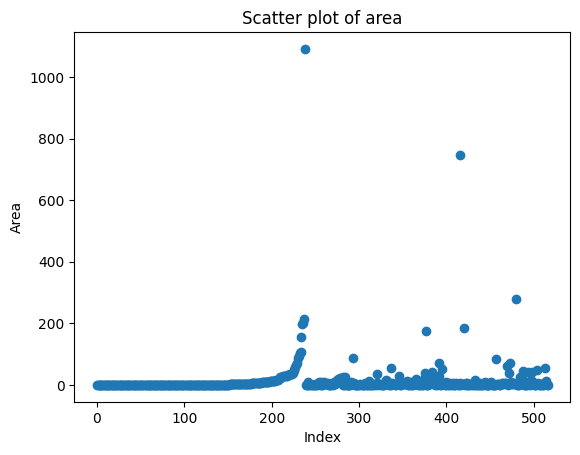

In [15]:
plt.scatter(forest_data_1.index, forest_data_1['area'])

plt.title("Scatter plot of area")
plt.xlabel("Index")
plt.ylabel("Area")


Histogram on the area burned

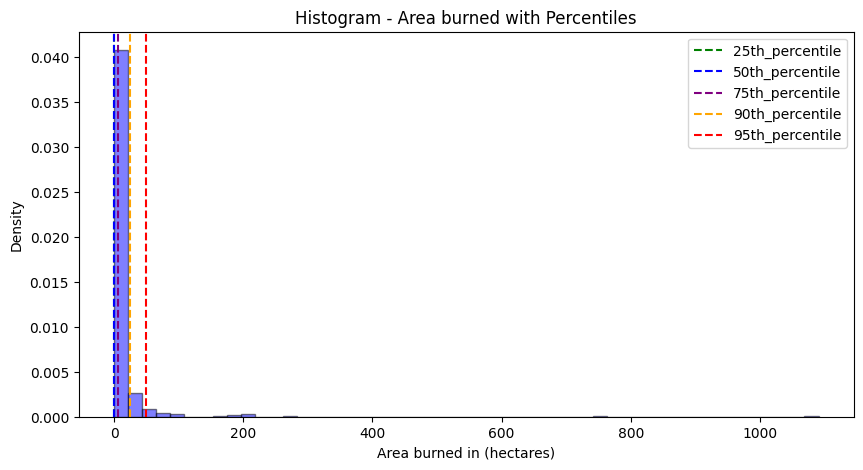

In [16]:
colors = ['green', 'blue', 'purple', 'orange', 'red']

percentile = [25, 50, 75, 90, 95]
percentile_val = np.percentile(forest_data_1['area'], percentile)

plt.figure(figsize=(10, 5))
plt.hist(forest_data_1['area'], bins=50, color='blue', edgecolor='black', alpha=0.5, density=True)
for p, value, color in zip(percentile, percentile_val, colors):
    plt.axvline(value, color=color, linestyle='--', label=f'{p}th_percentile')
plt.xlabel('Area burned in (hectares)')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram - Area burned with Percentiles')
plt.show()

Scatter plot of columns in relation to log(area)

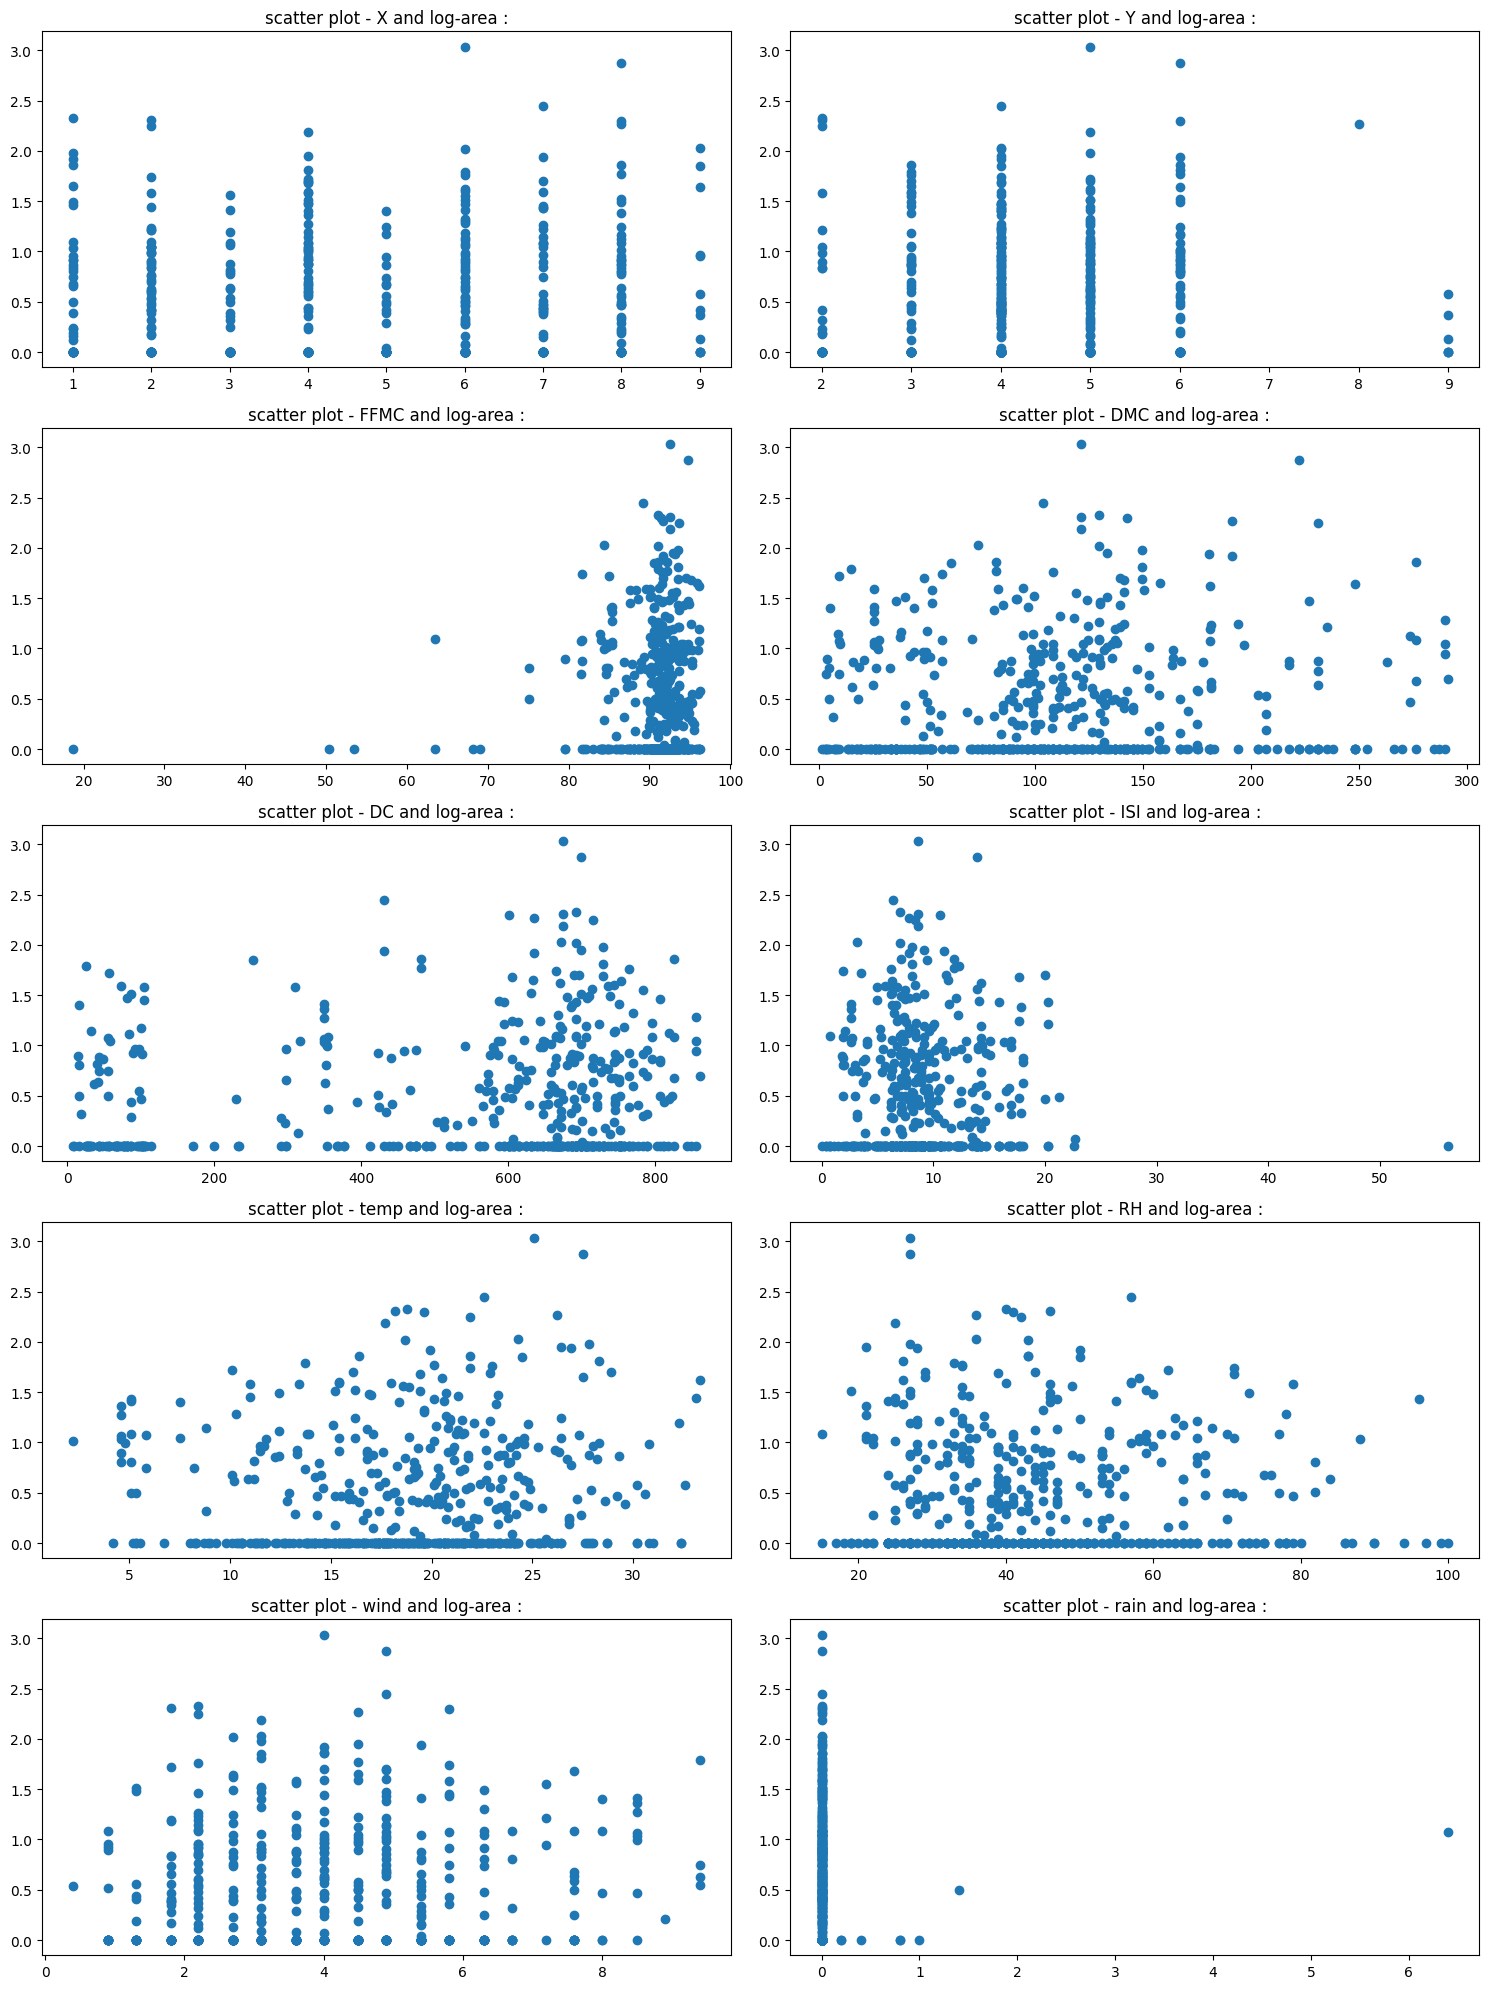

In [17]:
forest_data_1['log-area'] = np.log10(forest_data_1['area'] + 1)
plt.figure(figsize = (15, 20))

for i, col in enumerate(forest_data_1[numerical_features[:10]].columns, 1):
    plt.subplot(5, 2, i)
    plt.title(f'scatter plot - {col} and log-area :')
    plt.scatter(forest_data_1[col], forest_data_1['log-area'])
    plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap')

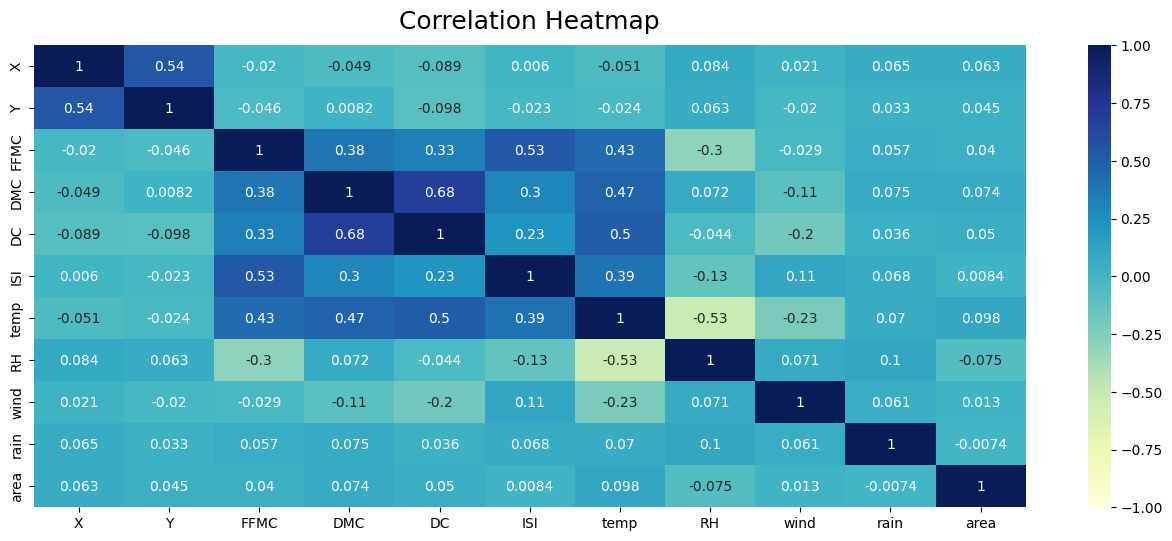

In [18]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(forest_data_1[numerical_features].corr(), vmin = -1, vmax = 1, annot = True, cmap = 'YlGnBu')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad = 12)

plotting corelation of all columns to area

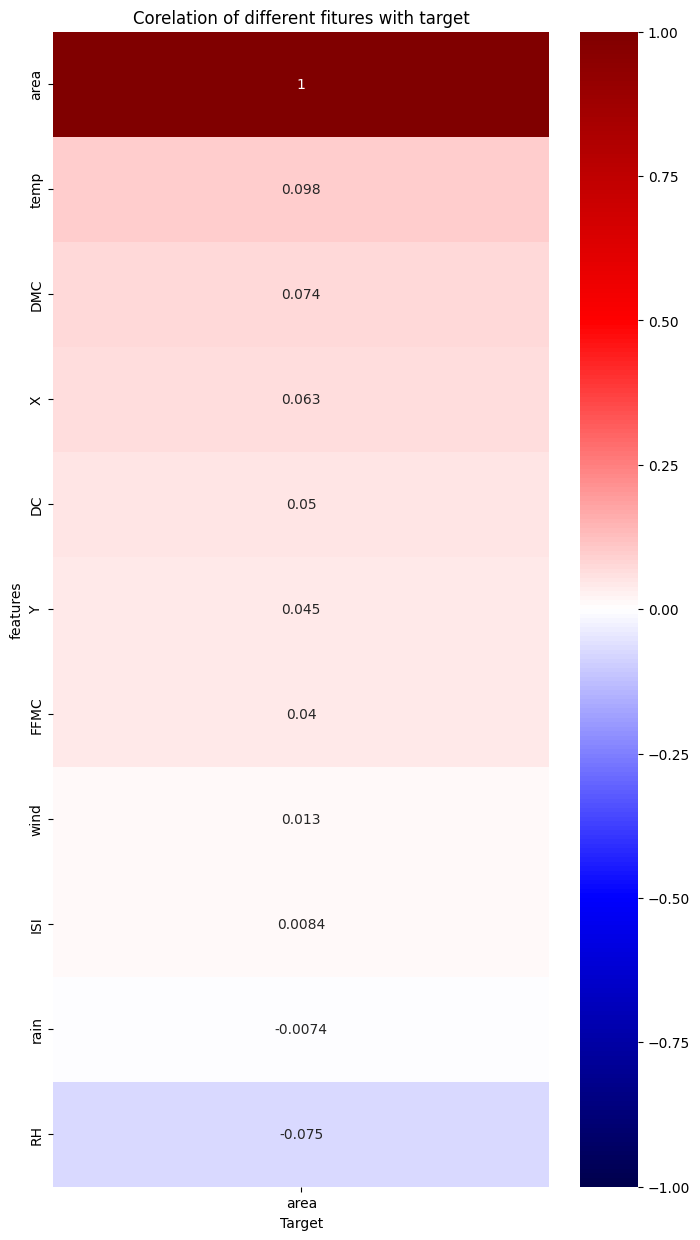

In [19]:
corr_new_train=forest_data_1[numerical_features].corr()
plt.figure(figsize=(8,15))
sns.heatmap(corr_new_train[['area']].sort_values(by=['area'],ascending=False).head(60),vmin=-1, cmap='seismic', annot=True)
plt.ylabel('features')
plt.xlabel('Target')
plt.title("Corelation of different fitures with target")
plt.show()

finding outliers - here the column area has outlier

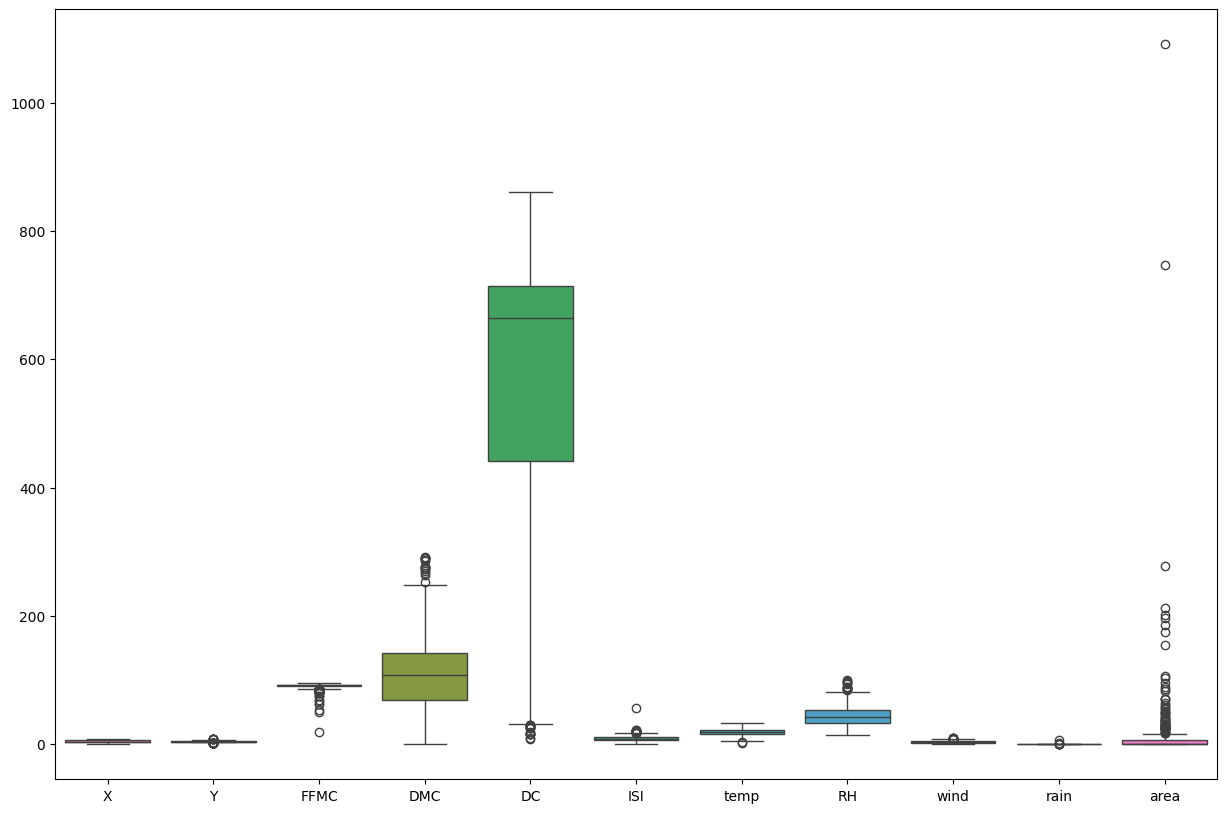

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=forest_data_1[numerical_features])
plt.show()

plotting density for all columns

<ipython-input-21-abc9a7756a39>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forest_data_1[col], color = 'g', shade = True)
<ipython-input-21-abc9a7756a39>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forest_data_1[col], color = 'g', shade = True)
<ipython-input-21-abc9a7756a39>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forest_data_1[col], color = 'g', shade = True)
<ipython-input-21-abc9a7756a39>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forest_data_1[col], color = 'g', shade 

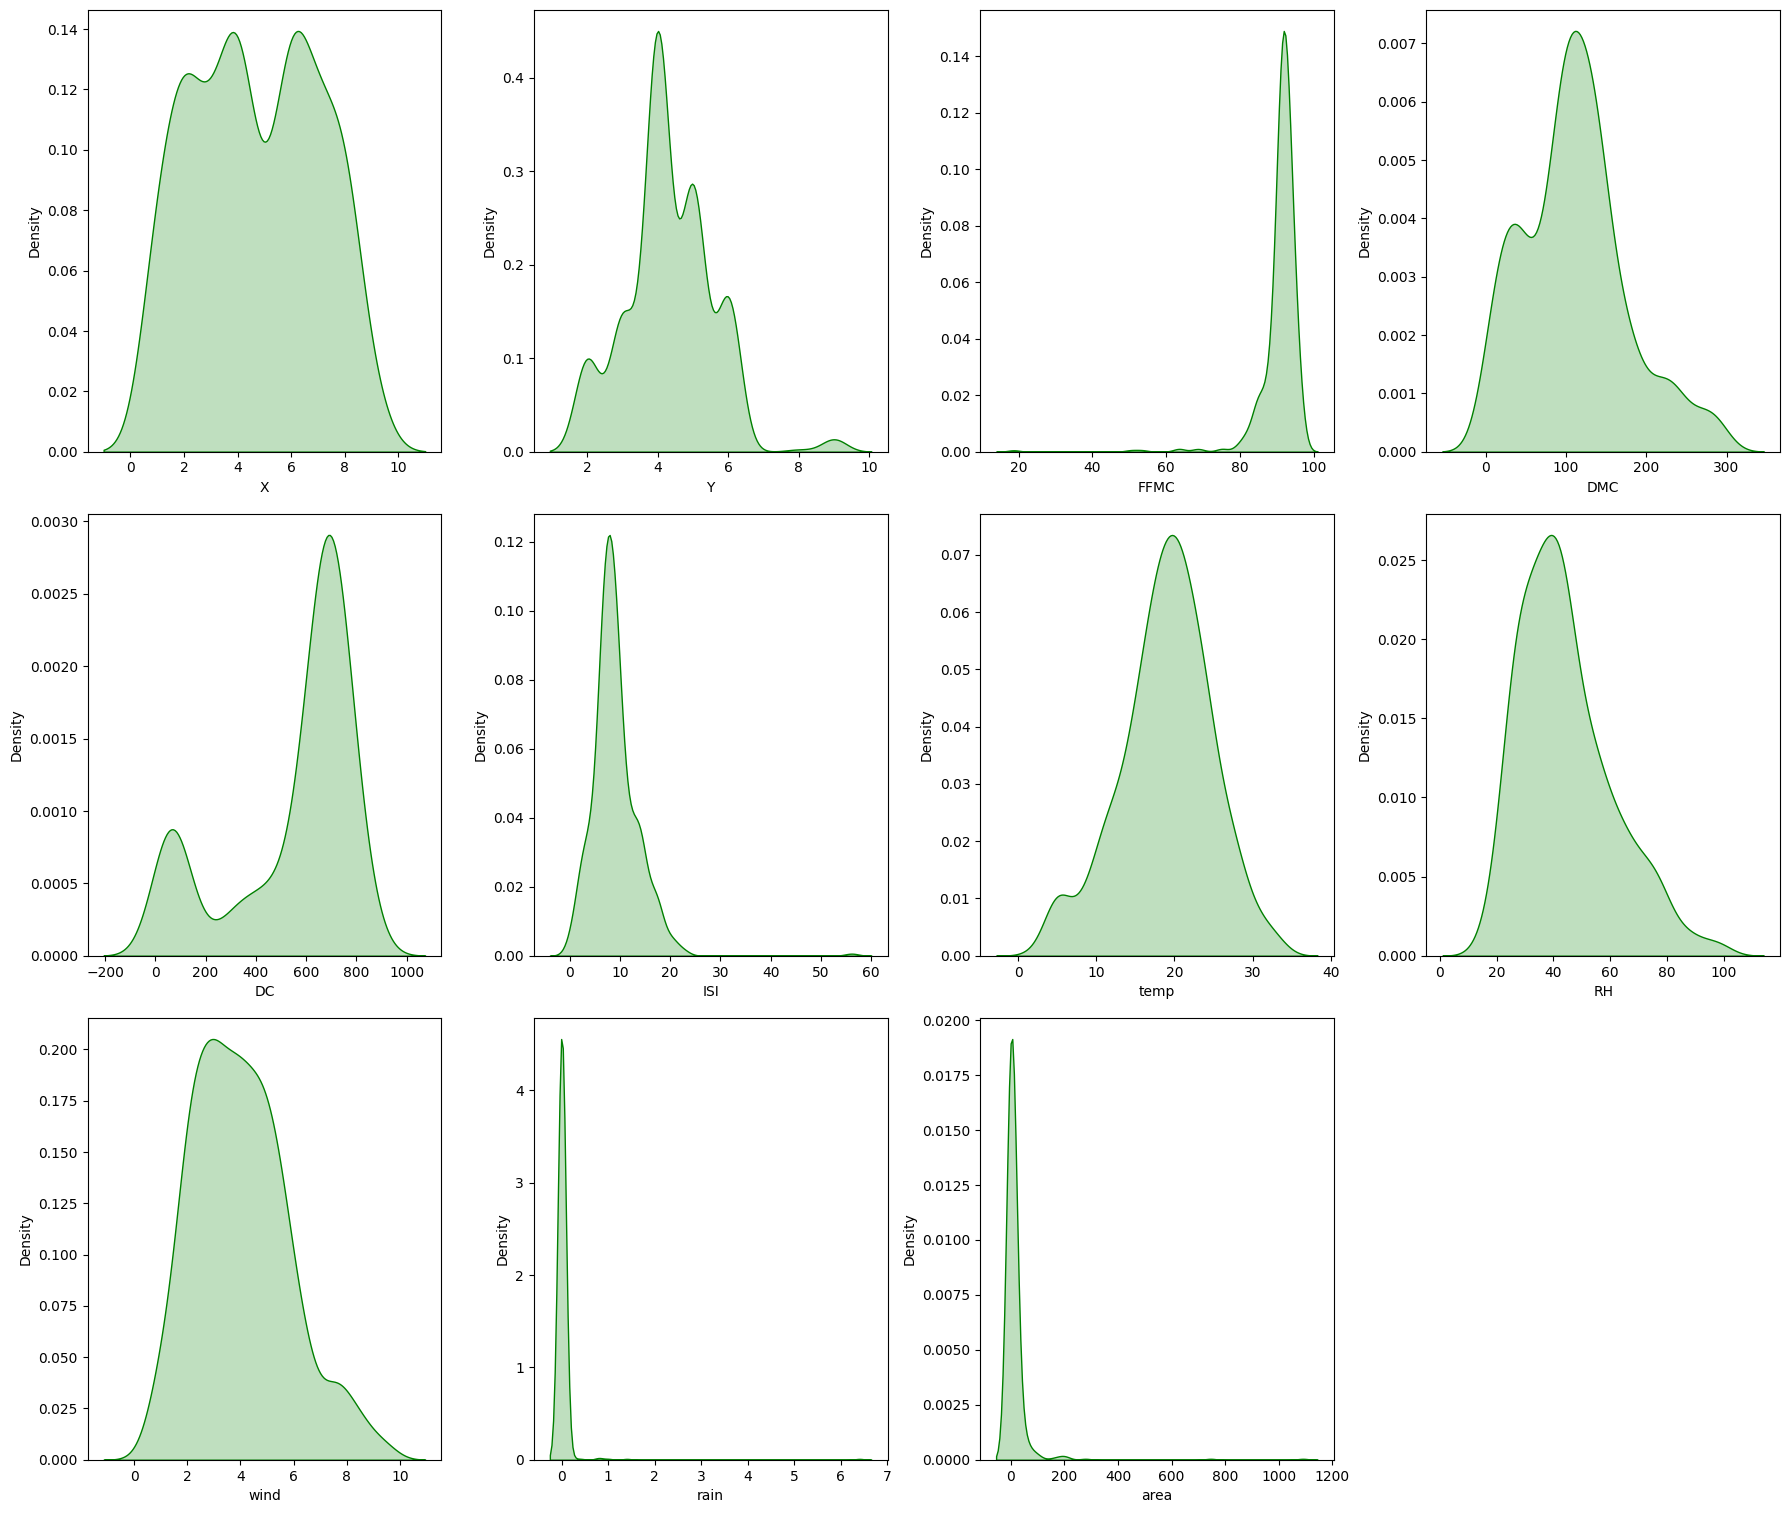

In [21]:
plt.figure(figsize = (18, 40))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(8, 4, i)
    sns.kdeplot(forest_data_1[col], color = 'g', shade = True)

plt.tight_layout()
plt.show()

<ipython-input-22-ce137b8c0900>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_area, x='month', y='area', palette='coolwarm')


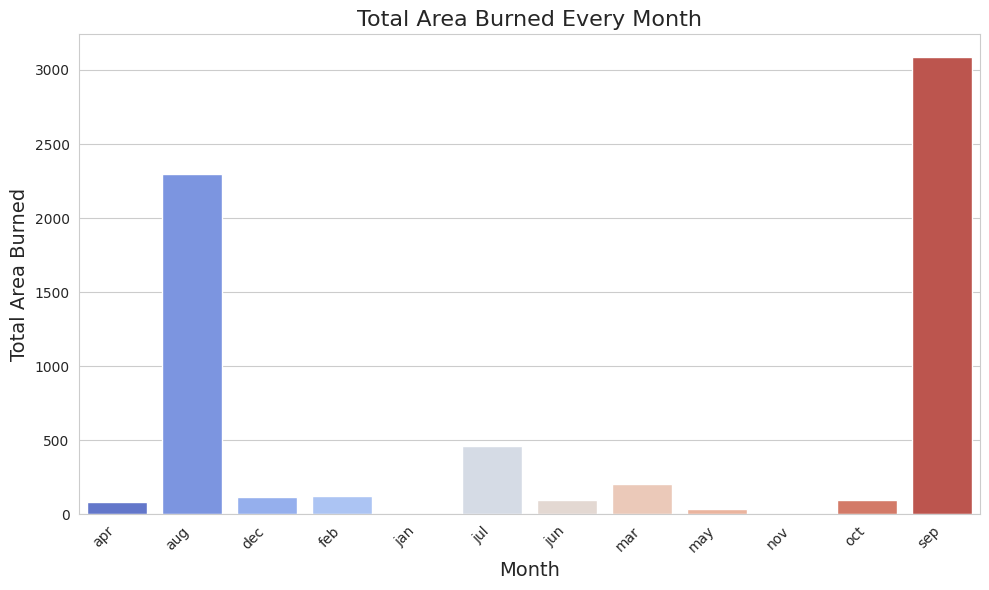

In [22]:
monthly_area = forest_data_1.groupby('month')['area'].sum().reset_index()

# Set Seaborn style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_area, x='month', y='area', palette='coolwarm')
plt.title('Total Area Burned Every Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Area Burned', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

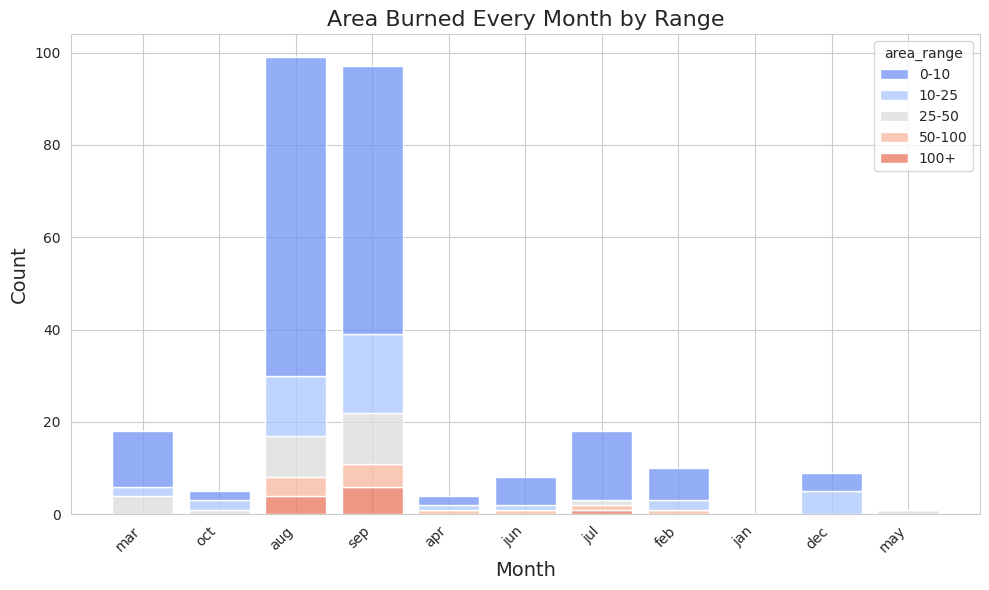

In [23]:
area_ranges = [0, 10, 25, 50, 100, float('inf')]
area_labels = ['0-10', '10-25', '25-50', '50-100', '100+']

forest_data_1['area_range'] = pd.cut(forest_data_1['area'], bins=area_ranges, labels=area_labels)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=forest_data_1, x='month', hue='area_range', multiple='stack', palette='coolwarm', shrink=0.8)
plt.title('Area Burned Every Month by Range', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

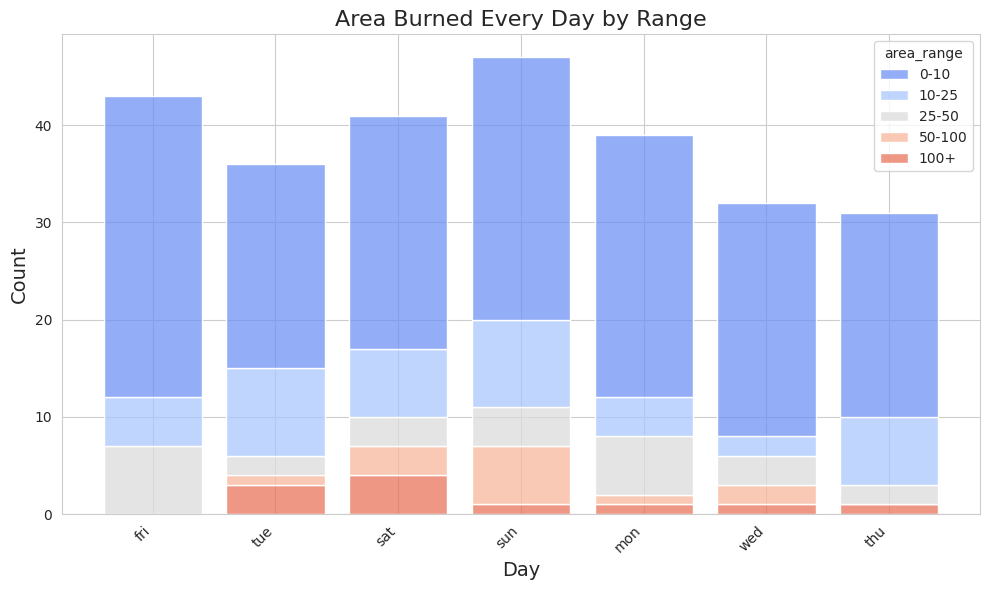

In [24]:
area_ranges = [0, 10, 25, 50, 100, float('inf')]
area_labels = ['0-10', '10-25', '25-50', '50-100', '100+']

forest_data_1['area_range'] = pd.cut(forest_data_1['area'], bins=area_ranges, labels=area_labels)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=forest_data_1, x='day', hue='area_range', multiple='stack', palette='coolwarm', shrink=0.8)
plt.title('Area Burned Every Day by Range', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

checking effect of outlier over the data

In [25]:
outliers = ['area','FFMC','ISI','rain']
forest_data_1 = pd.get_dummies(forest_data_1, columns=['day','month'], drop_first = True, dtype=int)

print(np.log1p(forest_data_1[outliers]).skew())

area     1.219398
FFMC   -11.630232
ISI     -0.931885
rain    14.117710
dtype: float64


In [26]:

from scipy.stats import zscore

forest_data_clean = forest_data_1
mask_value = forest_data_clean.loc[:, ['FFMC']].apply(zscore).abs() < 3

forest_data_clean['rain'] = forest_data_clean['rain'].apply(lambda x: int(x > 0.0))

forest_data_clean = forest_data_clean[mask_value.values]
forest_data_clean.shape

(506, 30)

In [27]:
np.log1p(forest_data_clean[outliers]).skew()

area    1.210025
FFMC   -1.794148
ISI    -0.431279
rain    7.786223
dtype: float64

In [28]:
forest_data_clean = forest_data_clean.drop(columns = ['area_range']).copy()
forest_data_clean

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,1,...,0,0,0,0,0,1,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0,...,0,0,0,0,0,0,0,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0,...,0,0,0,0,0,0,0,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0,...,0,0,0,0,0,0,0,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = forest_data_clean.drop(['area', 'log-area'], axis = 1)
y = forest_data_clean['log-area']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

randomforest_regressor = RandomForestRegressor()

randomforest_regressor.fit(X_train, y_train)
y_pred = randomforest_regressor.predict(X_test)
print("RMSE for Random Forest:",  np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE for Random Forest: 0.6809730112358494


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 0.565953066287946
Mean Squared Error (MSE): 0.46372424203162027


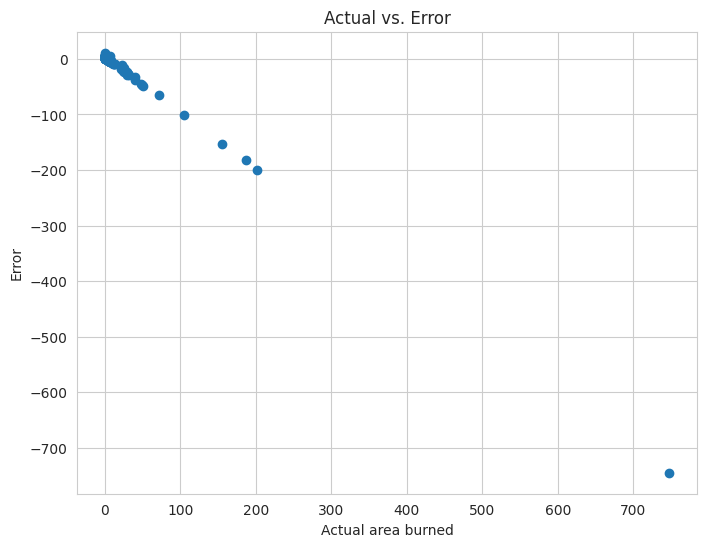

In [54]:
errors = 10 ** y_pred - 10 ** y_test

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(10 ** y_test, errors)
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.title("Actual vs. Error")
plt.show()

In [55]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

randomforest_regressor = RandomForestRegressor()

param_grid = {
    'max_depth': [5, 10, 15, 20, 50],
    'max_leaf_nodes': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split':[2, 5, 10]
}

grid_search = GridSearchCV(randomforest_regressor, param_grid, refit = True, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 50],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [56]:
best_params = grid_search.best_params_
best_params

{'max_depth': 15,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [57]:
from sklearn.metrics import mean_squared_error

y_pred = grid_search.predict(X_test)
print("RMSE for Random Forest:",  np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE for Random Forest: 0.6326460205548076


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 0.529107560009594
Mean Squared Error (MSE): 0.40024098732383395


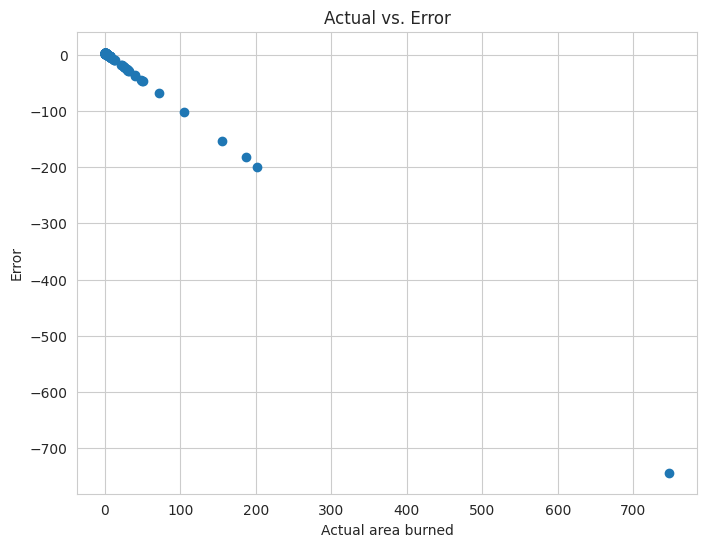

In [59]:
errors = 10 ** y_pred - 10 ** y_test

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(10 ** y_test, errors)
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.title("Actual vs. Error")
plt.show()

In [62]:
randomforest_regressor = RandomForestRegressor()

param_grid={'n_estimators': [200, 500, 1200],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto'],
            'max_depth': [10, 20, 30],
            'bootstrap': [True]}

grid_search_1 = GridSearchCV(randomforest_regressor, param_grid, refit = True, cv=5)

grid_search_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 500, 1200]})

In [63]:
best_params = grid_search_1.best_params_
best_params

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [64]:
from sklearn.metrics import mean_squared_error

y_pred = grid_search_1.predict(X_test)
print("RMSE for Random Forest:",  np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE for Random Forest: 0.6654309071170522


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 0.5469889543395295
Mean Squared Error (MSE): 0.442798292146623


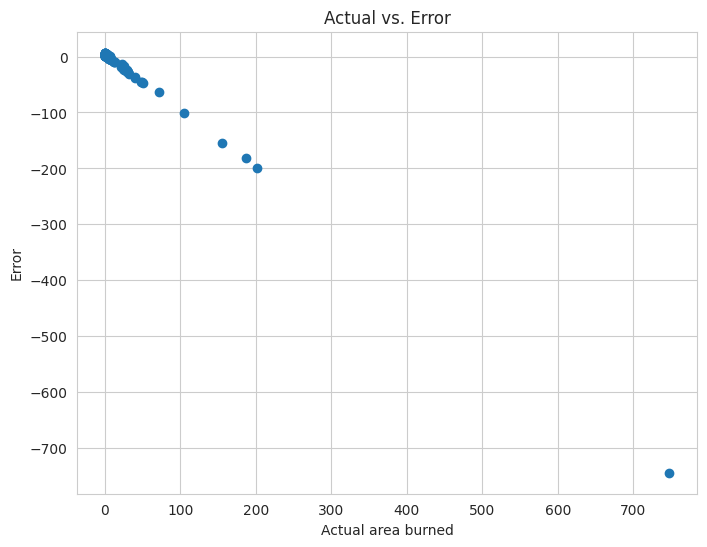

In [66]:
errors = 10 ** y_pred - 10 ** y_test

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(10 ** y_test, errors)
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.title("Actual vs. Error")
plt.show()

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [36]:
score = cross_val_score(grid_search, X_train, y_train, cv=k_fold, n_jobs=1, scoring='r2')
print(score)

[-0.06675367 -0.09947039 -0.07211427 -0.01914564  0.00387033 -0.06005267
 -0.30752904 -0.07274975 -0.0219461  -0.03204478]


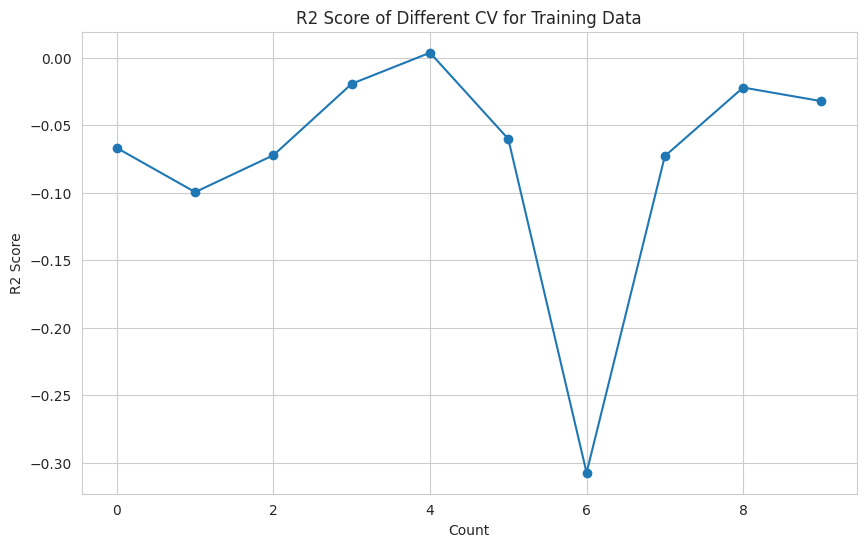

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(score, marker='o', linestyle='-')
plt.title("R2 Score of Different CV for Training Data")
plt.xlabel("Count")
plt.ylabel("R2 Score")
plt.grid(True)
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
log = LinearRegression()
log.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = log.predict(X_test)
print('RMSE for Linear Regression: ',np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE for Linear Regression:  0.6521771135040364


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 0.5424145609908364
Mean Squared Error (MSE): 0.4253349873784568


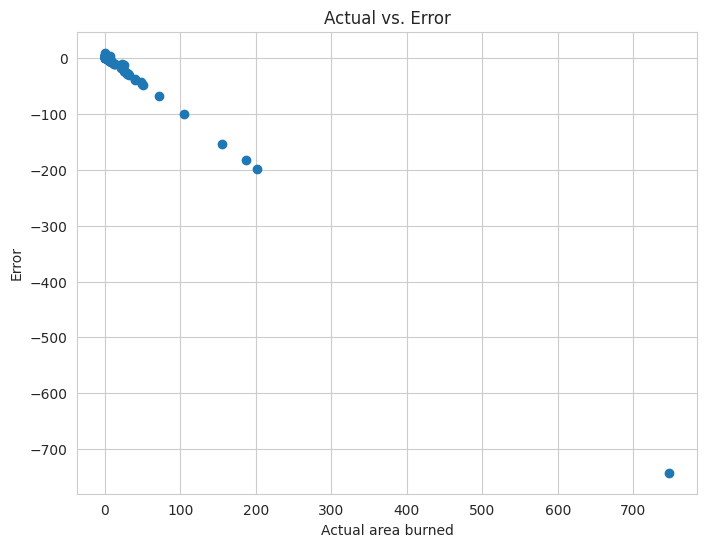

In [46]:
errors = 10 ** y_pred - 10 ** y_test

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(10 ** y_test, errors)
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.title("Actual vs. Error")
plt.show()